In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
acoes = ['^BVSP']
ydata = yf.download(acoes, '2019-04-18', '2024-04-18')
dados = ydata['Adj Close']
dados = pd.DataFrame(dados)
dados = dados * 100 / dados.iloc[0]
dados

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2019-04-18,100.000000
2019-04-22,100.010573
2019-04-23,101.422107
2019-04-24,100.493772
2019-04-25,102.087166
...,...
2024-04-11,134.699402
2024-04-12,133.166275
2024-04-15,132.519191


In [5]:
port_pesos = [0.5, 0, 0.5, 0]
port_pesos = np.array(port_pesos).T
dados

Ticker,LREN3.SA,SBFG3.SA,VULC3.SA,^BVSP
Date,,,,
2019-04-18,100.000000,100.000000,100.000000,100.000000
2019-04-22,102.184357,99.585059,99.206318,100.010573
2019-04-23,102.184357,99.004158,101.269826,101.422107
2019-04-24,101.342577,98.423240,100.793621,100.493772
2019-04-25,107.211734,99.170126,100.952349,102.087166
...,...,...,...,...
2024-04-11,53.027161,116.053141,355.056015,134.699402
2024-04-12,51.025531,108.072888,346.617390,133.166275
2024-04-15,50.390096,99.328576,339.233547,132.519191


Ticker      LREN3.SA  SBFG3.SA  VULC3.SA     ^BVSP
Date                                              
2019-04-18  0.000000  0.000000  0.000000  0.000000
2019-04-22  0.021844 -0.004149 -0.007937  0.000106
2019-04-23  0.000000 -0.005833  0.020800  0.014114
2019-04-24 -0.008238 -0.005868 -0.004702 -0.009153
2019-04-25  0.057914  0.007589  0.001575  0.015856
...              ...       ...       ...       ...
2024-04-11  0.019548 -0.019369 -0.005907 -0.005138
2024-04-12 -0.037747 -0.068764 -0.023767 -0.011382
2024-04-15 -0.012453 -0.080911 -0.021303 -0.004859
2024-04-16  0.013871 -0.029914  0.001244 -0.007540
2024-04-17 -0.026119  0.007929 -0.014286 -0.001753

[1242 rows x 4 columns]


<Axes: xlabel='Date'>

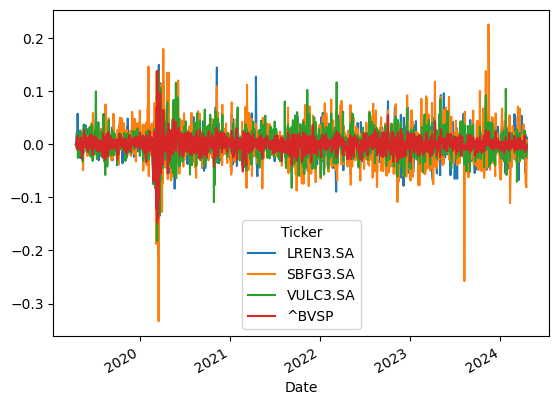

In [6]:
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)
print((dados_chg))
dados_chg.plot()

Ticker
LREN3.SA    -50.245339
SBFG3.SA     -2.878721
VULC3.SA    234.803253
^BVSP        31.289518
dtype: float64


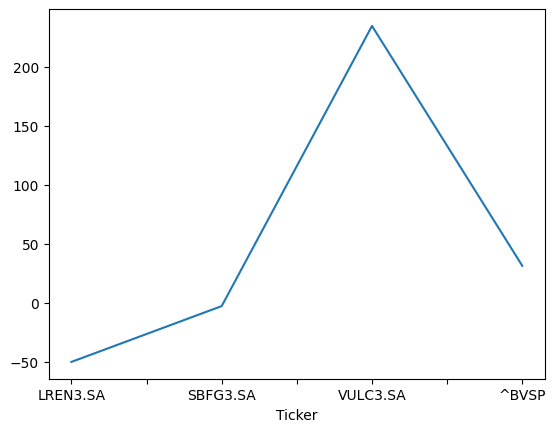

In [7]:
ret_acc = ((dados.iloc[-1] / dados.iloc[0]) - 1) * 100
ret_acc.plot()
print(ret_acc)

Ticker
LREN3.SA   -0.130305
SBFG3.SA   -0.005825
VULC3.SA    0.273380
^BVSP       0.055956
dtype: float64


<Axes: xlabel='Ticker'>

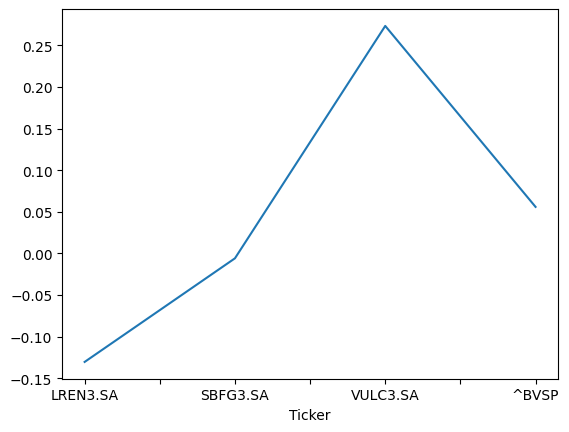

In [8]:
ret_aa = ((dados.iloc[-1] / dados.iloc[0]) **(1/5)) - 1
print(ret_aa)
ret_aa.plot()

Ticker
LREN3.SA    0.463557
SBFG3.SA    0.611434
VULC3.SA    0.426969
^BVSP       0.260750
dtype: float64


<Axes: xlabel='Ticker'>

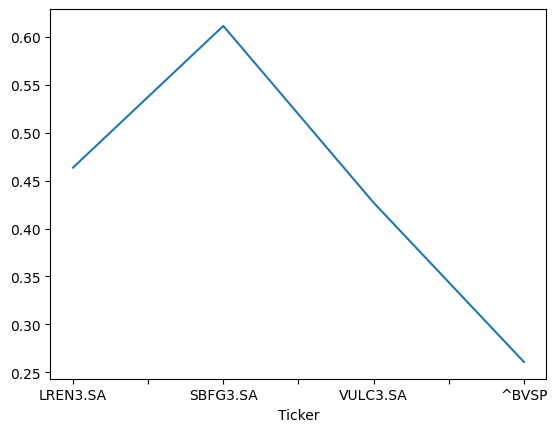

In [9]:
vol_aa = dados_chg.std() * np.sqrt(252)
print(vol_aa)
vol_aa.plot()

Ticker    LREN3.SA  SBFG3.SA  VULC3.SA     ^BVSP
Ticker                                          
LREN3.SA  1.000000  0.636014  0.564115  0.684163
SBFG3.SA  0.636014  1.000000  0.488846  0.591380
VULC3.SA  0.564115  0.488846  1.000000  0.590742
^BVSP     0.684163  0.591380  0.590742  1.000000


<Axes: xlabel='Ticker'>

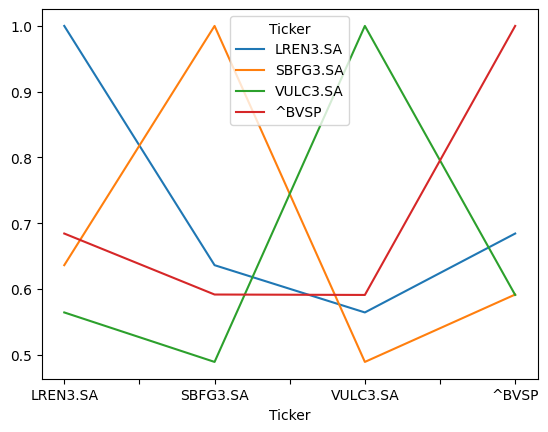

In [10]:
corr = dados_chg.corr()
print(corr)
corr.plot()

<Axes: xlabel='Date'>

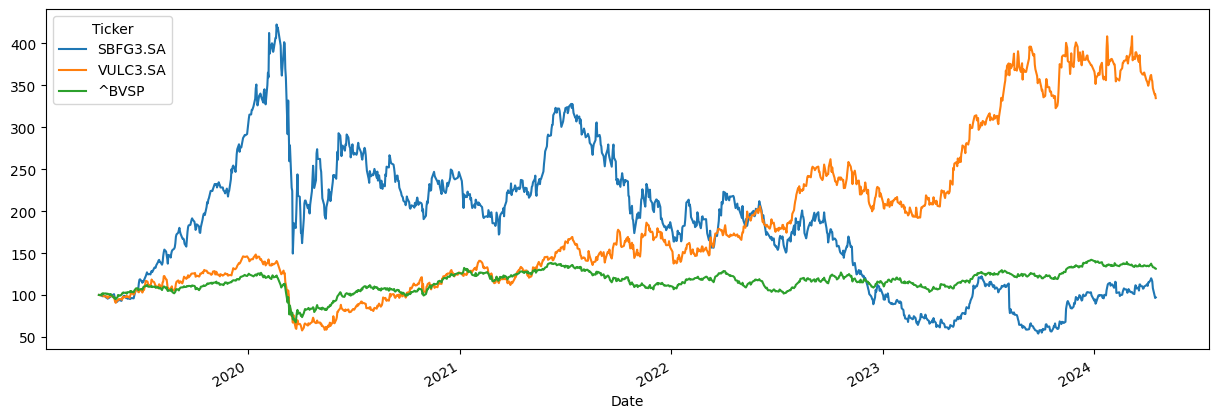

In [11]:
dados[['SBFG3.SA','VULC3.SA','^BVSP']].plot(figsize=(15,5))

In [12]:
ddown = pd.DataFrame()

for ativo in dados.columns:
    list = []

    for ind in range(dados.count()[0]):
        list.append((dados[ativo].iloc[ind] / dados[ativo].iloc[:ind + 1].max()-1) * 100)
    
    ddown[ativo] = list

ddown['Data'] = dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

print(ddown.min())

C:\Users\vncsa\AppData\Local\Temp\ipykernel_27224\2254686530.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
C:\Users\vncsa\AppData\Local\Temp\ipykernel_27224\2254686530.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
C:\Users\vncsa\AppData\Local\Temp\ipykernel_27224\2254686530.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.co

LREN3.SA   -76.354385
SBFG3.SA   -87.245147
VULC3.SA   -61.134892
^BVSP      -46.815809
dtype: float64


C:\Users\vncsa\AppData\Local\Temp\ipykernel_27224\2254686530.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):


In [13]:
def calc_ret_vol(ativos, ativos_chg, port_pesos):
    port = ativos.dot(port_pesos)

    port_chg = port.pct_change()
    port_chg = port_chg.fillna(0)

    ret = ((port.iloc[-1] / port.iloc[0]) ** (1/5)) - 1
    vol = port_chg.std()*np.sqrt(252)

    return ret, vol

In [14]:
points = []
min_vol_ret = [100, 0]
port_pesos = [0, 0, 0, 0]
for w in range(0, 101, 5):
    ret, vol = calc_ret_vol(dados, dados_chg, [w / 100, 0, (1 - w / 100), 0])
    print(f'Aloc:{round(w / 100, 2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}')

    points.append([ret, vol])

    if vol < min_vol_ret[0]:
        min_vol_ret[0] = vol
        min_vol_ret[1] = ret
        port_pesos[0] = w / 100
        port_pesos[2] = 1 - w / 100

Aloc:0.00 Ret:0.273 Vol:0.427
Aloc:0.05 Ret:0.262 Vol:0.421
Aloc:0.10 Ret:0.251 Vol:0.416
Aloc:0.15 Ret:0.239 Vol:0.412
Aloc:0.20 Ret:0.227 Vol:0.408
Aloc:0.25 Ret:0.214 Vol:0.404
Aloc:0.30 Ret:0.200 Vol:0.401
Aloc:0.35 Ret:0.186 Vol:0.398
Aloc:0.40 Ret:0.172 Vol:0.396
Aloc:0.45 Ret:0.156 Vol:0.395
Aloc:0.50 Ret:0.140 Vol:0.394
Aloc:0.55 Ret:0.122 Vol:0.394
Aloc:0.60 Ret:0.104 Vol:0.394
Aloc:0.65 Ret:0.084 Vol:0.395
Aloc:0.70 Ret:0.062 Vol:0.398
Aloc:0.75 Ret:0.039 Vol:0.401
Aloc:0.80 Ret:0.013 Vol:0.406
Aloc:0.85 Ret:-0.015 Vol:0.413
Aloc:0.90 Ret:-0.048 Vol:0.423
Aloc:0.95 Ret:-0.085 Vol:0.439
Aloc:1.00 Ret:-0.130 Vol:0.464


In [15]:
print(min_vol_ret)
print(port_pesos)

[0.3936701412340185, 0.1222689410734017]
[0.55, 0, 0.44999999999999996, 0]


Text(0.3936701412340185, 0.1222689410734017, 'Min, Vol')

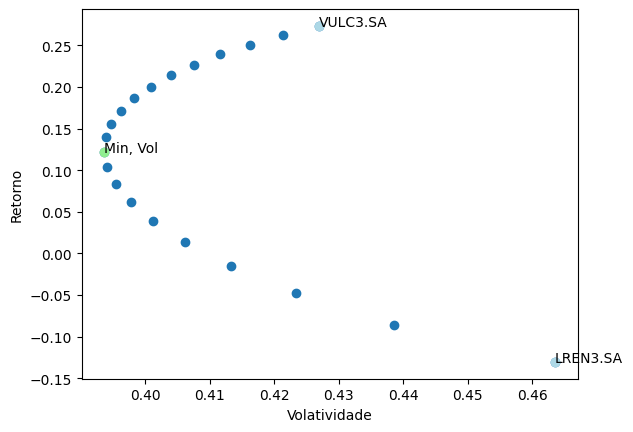

In [16]:
lp = np.array(points).T
plt.scatter(lp[[1][:]], lp[[0][:]])
plt.ylabel('Retorno')
plt.xlabel('Volatividade')

plt.scatter(vol_aa['LREN3.SA'], ret_aa['LREN3.SA'], color = 'lightblue')
plt.text(vol_aa['LREN3.SA'], ret_aa['LREN3.SA'], 'LREN3.SA')

plt.scatter(vol_aa['VULC3.SA'], ret_aa['VULC3.SA'], color = 'lightblue')
plt.text(vol_aa['VULC3.SA'], ret_aa['VULC3.SA'], 'VULC3.SA')

plt.scatter(min_vol_ret[0], min_vol_ret[1], color = 'lightgreen')
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min, Vol')

In [17]:
dados['PORT1'] = dados.dot(port_pesos)
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

ret_aa = ((dados.iloc[-1] / dados.iloc[0]) ** (1/5)) - 1
print ('Retorno anualizado: \n', ret_aa)

vol_aa = dados_chg.std()*np.sqrt(252)
print ('Volatividade anualizado: \n', vol_aa)

Retorno anualizado: 
 Ticker
LREN3.SA   -0.130305
SBFG3.SA   -0.005825
VULC3.SA    0.273380
^BVSP       0.055956
PORT1       0.122269
dtype: float64
Volatividade anualizado: 
 Ticker
LREN3.SA    0.463557
SBFG3.SA    0.611434
VULC3.SA    0.426969
^BVSP       0.260750
PORT1       0.393670
dtype: float64


In [18]:
dados = dados.drop(['PORT1'], axis = 1)
dados_chg = dados_chg.drop(['PORT1'], axis = 1)

In [19]:
points = []
min_vol_ret = [100, 0]
port_pesos = [0, 0, 0, 0]
for w1 in range(0, 101, 5):

    for w2 in range(0, 101-w1, 5):

        ret, vol = calc_ret_vol(dados, dados_chg, [w1 / 100, 0, w2 / 100, (1 - w1 / 100 - w2 / 100)])
        print(f'Aloc:{round(w1 / 100, 2):.2f} {round((w2 / 100), 2):.2f} {round(1 - w1 / 100 -w2 / 100, 2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}')

        points.append([ret, vol])

        if vol < min_vol_ret[0]:
            min_vol_ret[0] = vol
            min_vol_ret[1] = ret
            port_pesos[0] = w1 / 100
            port_pesos[2] = w2 / 100
            port_pesos[3] = 1 - w1 / 100 - w2 / 100

Aloc:0.00 0.00 1.00 Ret:0.056 Vol:0.261
Aloc:0.00 0.05 0.95 Ret:0.072 Vol:0.262
Aloc:0.00 0.10 0.90 Ret:0.087 Vol:0.265
Aloc:0.00 0.15 0.85 Ret:0.101 Vol:0.270
Aloc:0.00 0.20 0.80 Ret:0.115 Vol:0.276
Aloc:0.00 0.25 0.75 Ret:0.127 Vol:0.283
Aloc:0.00 0.30 0.70 Ret:0.140 Vol:0.290
Aloc:0.00 0.35 0.65 Ret:0.152 Vol:0.298
Aloc:0.00 0.40 0.60 Ret:0.163 Vol:0.307
Aloc:0.00 0.45 0.55 Ret:0.174 Vol:0.316
Aloc:0.00 0.50 0.50 Ret:0.184 Vol:0.325
Aloc:0.00 0.55 0.45 Ret:0.195 Vol:0.334
Aloc:0.00 0.60 0.40 Ret:0.204 Vol:0.344
Aloc:0.00 0.65 0.35 Ret:0.214 Vol:0.354
Aloc:0.00 0.70 0.30 Ret:0.223 Vol:0.364
Aloc:0.00 0.75 0.25 Ret:0.232 Vol:0.374
Aloc:0.00 0.80 0.20 Ret:0.241 Vol:0.384
Aloc:0.00 0.85 0.15 Ret:0.249 Vol:0.395
Aloc:0.00 0.90 0.10 Ret:0.258 Vol:0.405
Aloc:0.00 0.95 0.05 Ret:0.266 Vol:0.416
Aloc:0.00 1.00 0.00 Ret:0.273 Vol:0.427
Aloc:0.05 0.00 0.95 Ret:0.049 Vol:0.263
Aloc:0.05 0.05 0.90 Ret:0.066 Vol:0.264
Aloc:0.05 0.10 0.85 Ret:0.081 Vol:0.268
Aloc:0.05 0.15 0.80 Ret:0.095 Vol:0.273


In [20]:
print(min_vol_ret)
print(port_pesos)

[0.2607504770629407, 0.05595645791590842]
[0.0, 0, 0.0, 1.0]


Text(0.2607504770629407, 0.05595645791590842, 'Min, Vol')

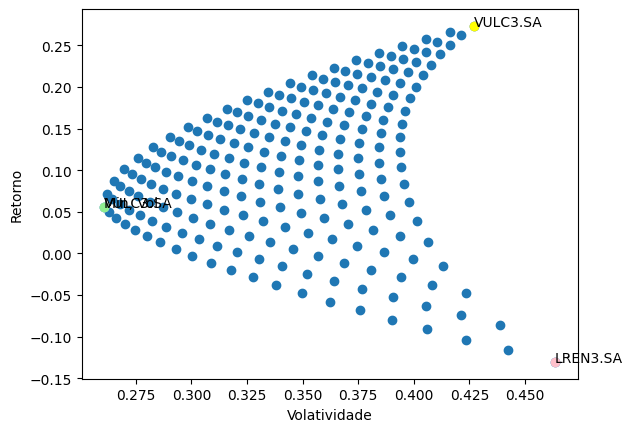

In [21]:
lp = np.array(points).T
plt.scatter(lp[[1][:]], lp[[0][:]])
plt.ylabel('Retorno')
plt.xlabel('Volatividade')

plt.scatter(vol_aa['LREN3.SA'], ret_aa['LREN3.SA'], color = 'pink')
plt.text(vol_aa['LREN3.SA'], ret_aa['LREN3.SA'], 'LREN3.SA')

plt.scatter(vol_aa['VULC3.SA'], ret_aa['VULC3.SA'], color = 'yellow')
plt.text(vol_aa['VULC3.SA'], ret_aa['VULC3.SA'], 'VULC3.SA')

plt.scatter(vol_aa['^BVSP'], ret_aa['^BVSP'], color = 'lightblue')
plt.text(vol_aa['^BVSP'], ret_aa['^BVSP'], 'VULC3.SA')

plt.scatter(min_vol_ret[0], min_vol_ret[1], color = 'lightgreen')
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min, Vol')